In [1]:
import tensorflow as tf

##Comment these 2 lines out if you don't have a GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import cv2
import os
import glob

from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split



In [3]:
tomato_dir = os.path.join(os.getcwd(), "tomato_Google_Search")
tomato_data_path = os.path.join(tomato_dir,'*g')
tomato_files = glob.glob(tomato_data_path)
tomato_data = []
for f1 in tomato_files:
    img = cv2.imread(f1)
    if img is not None:
        img_pil = Image.fromarray(img)
        img_pil_resize = img_pil.resize((100, 100))
        tomato_data.append(np.array(img_pil_resize))

In [4]:
potato_dir = os.path.join(os.getcwd(), "potato_Google_Search")
potato_data_path = os.path.join(potato_dir,'*g')
potato_files = glob.glob(potato_data_path)
potato_data = []
for f1 in potato_files:
    #img = cv2.imread(f1)
    #potato_data.append(img)
    img = cv2.imread(f1)
    if img is not None:
        img_pil = Image.fromarray(img)
        img_pil_resize = img_pil.resize((100, 100))
        potato_data.append(np.array(img_pil_resize))

In [5]:
tomato_label = [0] * len(tomato_data)
potato_label = [1] * len(potato_data)

In [6]:
tomato_image_train, tomato_image_test, tomato_label_train, tomato_label_test = train_test_split(tomato_data, tomato_label, test_size=0.3, random_state=20)
potato_image_train, potato_image_test, potato_label_train, potato_label_test = train_test_split(potato_data, potato_label, test_size=0.3, random_state=20)

training_images = np.array(tomato_image_train + potato_image_train)
training_labels = np.array(tomato_label_train + potato_label_train)

remaining_images = np.array(tomato_image_test + potato_image_test)
remaining_labels = np.array(tomato_label_test + potato_label_test)

validation_images, test_images, validation_labels, test_labels = train_test_split(remaining_images, remaining_labels, test_size=0.15, random_state=10)

training_images, validation_images, test_images = training_images / 255.0, validation_images / 255.0, test_images / 255.0

In [7]:
assert(len(training_images) + len(validation_images) + len(test_images) == len(tomato_data) + len(potato_data))

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 100)       2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 200)       180200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 200)       360200    
Total params: 543,200
Trainable params: 543,200
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))

Train on 906 samples, validate on 331 samples
Epoch 1/10
906/906 [==============================] - 3s 4ms/sample - loss: 0.8952 - accuracy: 0.6479 - val_loss: 0.4340 - val_accuracy: 0.8218
Epoch 2/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.3418 - accuracy: 0.8598 - val_loss: 0.2725 - val_accuracy: 0.8912
Epoch 3/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.2865 - accuracy: 0.8940 - val_loss: 0.2993 - val_accuracy: 0.9003
Epoch 4/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.2439 - accuracy: 0.9150 - val_loss: 0.2851 - val_accuracy: 0.8912
Epoch 5/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.1573 - accuracy: 0.9448 - val_loss: 0.2840 - val_accuracy: 0.9184
Epoch 6/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.1799 - accuracy: 0.9305 - val_loss: 0.2530 - val_accuracy: 0.9335
Epoch 7/10
906/906 [==============================] - 1s 1ms/sample - loss: 0.1362 - accur

331/331 - 0s - loss: 0.3454 - accuracy: 0.9215


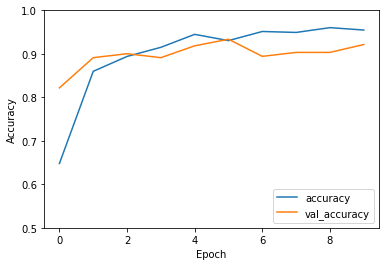

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_images,  validation_labels, verbose=2)

In [13]:
label_converter = {0 : "tomato", 1 : "potato"}
def convert_list(labels):
    for i in range(len(labels)):
        labels[i] = label_converter[labels[i]]
    return labels

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

y_actu = pd.Series(convert_list(list(test_labels)), name='Actual')
y_pred = pd.Series(convert_list(list(model.predict_classes(test_images))), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)


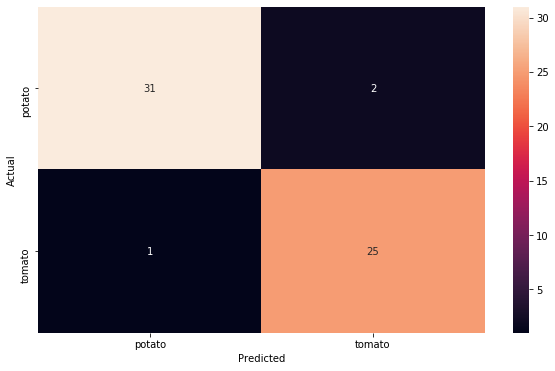

In [15]:
import seaborn as sns
plt.figure(figsize=(10,6))  
sns.heatmap(df_confusion, annot=True)